# Аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


In [ ]:
import numpy as np
from scipy import optimize
import math
import scipy
from matplotlib import pylab as plt

In [2]:
def f(x):
    return np.sin(x/5.)*np.exp(x/10.)+5.*np.exp(-x/2.)

In [4]:
A = np.array([[1.,1.],[1.,15.]])
b = np.array([f(1),f(15)])
multinimial = scipy.linalg.solve(A,b)

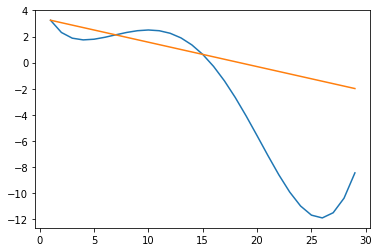

In [5]:
x = np.arange(1,30,1)
plt.plot(x,f(x))
y = multinimial[0]+multinimial[1]*x
plt.plot(x,y)
plt.show()

In [32]:
A = np.array([[1.,1.,1.],[1.,8.,64.],[1.,15.,225,]])
b = np.array([f(1.),f(8.),f(15.)])

multinimial = scipy.linalg.solve(A,b)

In [33]:
multinimial

array([ 3.32512949, -0.06531159, -0.00760104])

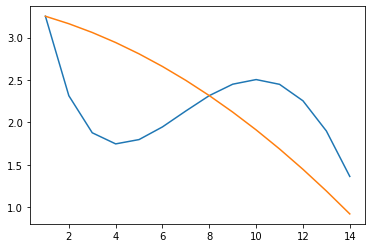

In [35]:
x = np.arange(1,15,1)
plt.plot(x,f(x))
y = multinimial[0]+multinimial[1]*x + multinimial[2]*((x)**2)
plt.plot(x,y)
plt.show()

In [36]:
A = np.array([[1.,1.,1.,1.],[1.,4.,16.,64.],[1,10,100,1000],[1.,15.,225,3375.]])
b = np.array([f(1.),f(4.),f(10.),f(15.)])
multinimial = scipy.linalg.solve(A,b)

In [37]:
multinimial

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

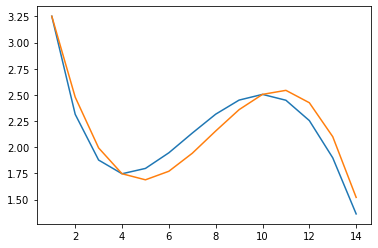

In [38]:
x = np.arange(1,15,1) 
plt.plot(x,f(x))
y = multinimial[0]+multinimial[1]*x + multinimial[2]*x**2 + multinimial[3]*x**3
plt.plot(x,y)
plt.show()